In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [62]:
data = pd.read_csv('/Users/gaozhichien/Downloads/TXF1-分鐘-成交價.txt')
data.Date = pd.to_datetime(data.Date)
data.Time = pd.to_timedelta(data.Time)
dataclose = data.drop(columns=['Open', 'High','Low','TotalVolume'])
data.head()

,Date,Time,Open,High,Low,Close,TotalVolume
0,2000-01-04,0 days 09:01:00,8688.0,8688.0,8676.0,8680.0,67
1,2000-01-04,0 days 09:02:00,8662.0,8698.0,8662.0,8698.0,52
2,2000-01-04,0 days 09:03:00,8698.0,8700.0,8690.0,8700.0,31
3,2000-01-04,0 days 09:04:00,8700.0,8700.0,8680.0,8700.0,38
4,2000-01-04,0 days 09:05:00,8700.0,8700.0,8652.0,8680.0,44


In [61]:
dataclose

,Date,Time,Close
0,2000-01-04,0 days 09:01:00,8680.0
1,2000-01-04,0 days 09:02:00,8698.0
2,2000-01-04,0 days 09:03:00,8700.0
3,2000-01-04,0 days 09:04:00,8700.0
4,2000-01-04,0 days 09:05:00,8680.0
...,...,...,...
2170262,2020-10-24,0 days 04:56:00,12862.0
2170263,2020-10-24,0 days 04:57:00,12862.0
2170264,2020-10-24,0 days 04:58:00,12862.0
2170265,2020-10-24,0 days 04:59:00,12862.0


In [18]:
log_returns = np.log(1+data['Close'].pct_change())

In [19]:
log_returns

2000-01-04 09:01:00         NaN
2000-01-04 09:02:00    0.002072
2000-01-04 09:03:00    0.000230
2000-01-04 09:04:00    0.000000
2000-01-04 09:05:00   -0.002301
                         ...   
2020-10-24 04:56:00    0.000078
2020-10-24 04:57:00    0.000000
2020-10-24 04:58:00    0.000000
2020-10-24 04:59:00    0.000000
2020-10-24 05:00:00    0.000311
Name: Close, Length: 2170267, dtype: float64

<AxesSubplot:>

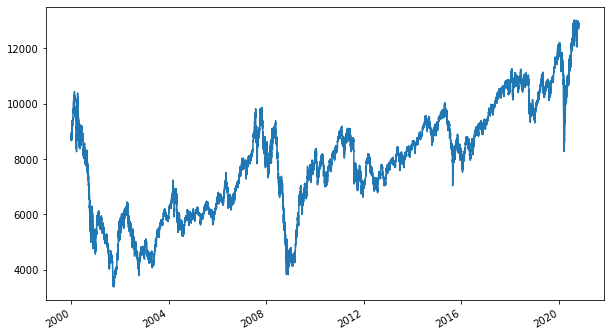

In [21]:
data['Close'].plot(figsize=(10,6))

<AxesSubplot:>

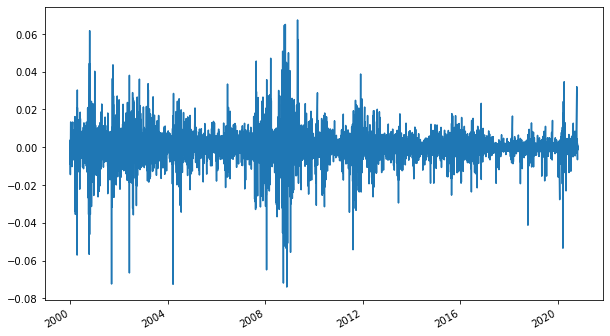

In [22]:
log_returns.plot(figsize=(10,6))

In [30]:
MEAN = log_returns.mean()
VAR = log_returns.var()
print(MEAN)
print(VAR)

1.813448878235261e-07
4.6503566869222883e-07


# drift = MEAN-1/2 VAR###

In [31]:
drift = MEAN - (0.5 * VAR)
drift

-5.1172946522588326e-08

In [32]:
stdev = log_returns.std()
stdev

0.0006819352379018325

In [34]:
type(stdev)

float

In [35]:
np.array(drift)

array(-5.11729465e-08)

In [37]:
stdev.values

AttributeError: 'float' object has no attribute 'values'

In [41]:
norm.ppf(0.95)

1.6448536269514722

In [44]:
x = np.random.rand(10,2)
x

array([[0.74476573, 0.73229798],
       [0.66988187, 0.18723619],
       [0.68374067, 0.76594612],
       [0.40944896, 0.72380884],
       [0.6601252 , 0.12437824],
       [0.79183655, 0.40205184],
       [0.13243455, 0.46968566],
       [0.63914576, 0.64260474],
       [0.25236882, 0.12867162],
       [0.52482748, 0.45614295]])

In [45]:
norm.ppf(x)

array([[ 0.65810829,  0.61977787],
       [ 0.43958698, -0.88812712],
       [ 0.47818482,  0.72556129],
       [-0.2289627 ,  0.59419406],
       [ 0.41280486, -1.15337505],
       [ 0.81281017, -0.2480397 ],
       [-1.11495642, -0.07606005],
       [ 0.35617637,  0.36542991],
       [-0.66705399, -1.1326929 ],
       [ 0.06227349, -0.1101557 ]])

In [47]:
Z=norm.ppf(np.random.rand(10,2))
Z

array([[-0.91067433,  1.13109834],
       [-0.34322977,  1.37129161],
       [ 0.94141093,  1.48683527],
       [-0.15300128, -1.35325277],
       [ 0.88155343,  0.16224306],
       [ 0.9265965 , -1.10548072],
       [-0.43780704, -1.40777063],
       [-0.52515226,  0.52027471],
       [ 1.09449422,  0.32959209],
       [ 0.56096098, -0.50814521]])

In [123]:
t_intervals = 15
itterations = 1000

In [124]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, itterations)))

In [125]:
daily_returns

array([[1.00032439, 0.99974801, 0.99915345, ..., 1.00109561, 0.99933314,
        1.00115718],
       [0.9988833 , 1.00122344, 1.00075499, ..., 0.99972557, 1.00006868,
        0.99935083],
       [1.00046556, 1.00115135, 1.00040588, ..., 1.00145407, 0.99978037,
        1.00053608],
       ...,
       [1.00036412, 1.00003375, 1.00053303, ..., 1.0013718 , 1.00120854,
        0.9998509 ],
       [0.99991278, 1.00147879, 1.00071024, ..., 1.00115144, 1.00039007,
        1.00009395],
       [1.000221  , 0.99874852, 0.99961155, ..., 0.99937922, 1.00061068,
        1.0000541 ]])

In [126]:
S0 = data['Close'].iloc[-1]

In [127]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [128]:
price_list[0] = S0

In [129]:
price_list

array([[12866., 12866., 12866., ..., 12866., 12866., 12866.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [130]:
for t in range (1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [131]:
price_list

array([[12866.        , 12866.        , 12866.        , ...,
        12866.        , 12866.        , 12866.        ],
       [12851.63254218, 12881.74079645, 12875.71366092, ...,
        12862.46921165, 12866.88367204, 12857.64781024],
       [12857.61575457, 12896.57213306, 12880.93962676, ...,
        12881.17211722, 12864.05767363, 12864.54054518],
       ...,
       [12853.09152284, 12898.52682504, 12926.05435546, ...,
        12918.75407291, 12886.26194612, 12888.44103046],
       [12851.97043808, 12917.60104071, 12935.23498252, ...,
        12933.62922091, 12891.28847449, 12889.65194534],
       [12854.8106928 , 12901.43490732, 12930.21032993, ...,
        12925.6002225 , 12899.16091406, 12890.34923432]])

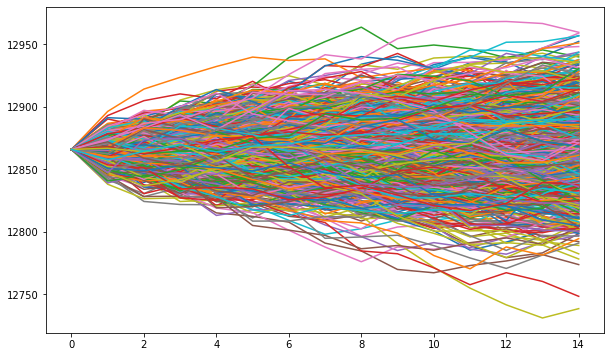

In [132]:
plt.figure(figsize = (10,6))
plt.plot(price_list);